In [37]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.sans-serif'] = ['SimHei']  #防止中文乱码，还可以有Microsoft YaHei
plt.rcParams["axes.unicode_minus"] = False   #字符显示，防止负号乱码

import warnings
warnings.filterwarnings('ignore')

In [38]:
plt.style.use('ggplot')

# path length

In [39]:
pathLen = pd.read_csv('data/path_length.csv')

pathLen = pathLen.drop(['Unnamed: 0'], axis=1)

In [40]:
pathLen.T

,0,1,2,3,4
BFS,44.250734,54.253424,32.709901,43.610122,22.709124
Dijkstra(1),44.250734,54.253424,32.709901,44.005565,22.709124
Dijkstra(Haversine),44.091351,53.390340,32.709901,42.107795,20.090581
Dijkstra(Euclidean),44.091351,53.390340,32.709901,42.107795,20.090581
BellmanFord(Euclidean),44.091351,53.390340,32.709901,42.107795,20.090581
G_BFS(Haversine),44.091351,54.772234,35.475398,42.517197,22.709124
G_BFS(Euclidean),44.091351,54.772234,35.475398,42.517197,22.709124
"A_star(1, Euclidean)",44.250734,54.253424,32.709901,44.685085,22.709124
"A_star(1, Haversine)",44.250734,54.253424,32.709901,44.685085,22.709124
"A_star(Euclidean, Euclidean)",44.091351,53.390340,32.709901,42.107795,20.090581


- For BFS

- For Dijkstra, they are same

- For BellmanFord

- For GBFS: GBFS(Haversine), GBFS(Euclidean) same

- For A_star:

        A_star(1,H), A_star(1,E) same
        A_star(E,H), A_star(E,E), A_star(H,H), A_star(H,E) same


- For bi_A_star:

        bi_A_star(1,E), bi_A_star(1,H) same
        bi_A_star(H,E), bi_A_star(E,E) same
        bi_A_star(H,H), bi_A_star(E,H) same

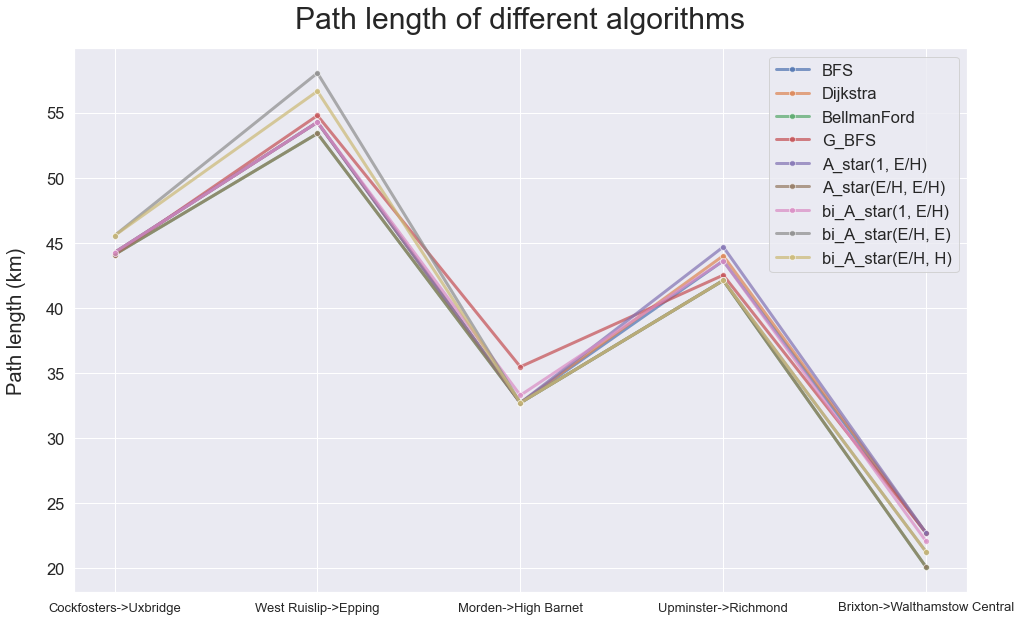

In [41]:
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)
sns.lineplot(data = pathLen['BFS'], label='BFS',marker='o',linewidth = 3,alpha = 0.7)
sns.lineplot(data = pathLen['Dijkstra(1)'], label='Dijkstra',marker='o',linewidth = 3,alpha = 0.7)
sns.lineplot(data = pathLen['BellmanFord(Euclidean)'], label='BellmanFord',marker='o',linewidth = 3,alpha = 0.7)
sns.lineplot(data= pathLen['G_BFS(Haversine)'], label='G_BFS',marker='o',linewidth = 3,alpha = 0.7)
sns.lineplot(data = pathLen['A_star(1, Euclidean)'], label='A_star(1, E/H)',marker='o',linewidth = 3,alpha = 0.7)
sns.lineplot(data = pathLen['A_star(Euclidean, Euclidean)'], label='A_star(E/H, E/H)',marker='o',linewidth = 3,alpha = 0.7)
# sns.lineplot(data = pathLen['A_star(Haversine, Euclidean)'], label='A_star(Haversine, E/H)',marker='o',linewidth = 3,alpha = 0.7)
sns.lineplot(data=pathLen['bi_A_star(1, Haversine)'], label='bi_A_star(1, E/H)',marker='o',linewidth = 3,alpha = 0.7)
sns.lineplot(data=pathLen['bi_A_star(Euclidean, Euclidean)'], label='bi_A_star(E/H, E)',marker='o',linewidth = 3,alpha = 0.7)
sns.lineplot(data=pathLen['bi_A_star(Haversine, Haversine)'], label='bi_A_star(E/H, H)',marker='o',linewidth = 3,alpha = 0.7)

plt.title("Path length of different algorithms",fontsize=30, pad=20)
plt.ylabel("Path length (km)",fontsize=20, labelpad=20)
plt.xticks([0,1,2,3,4],["Cockfosters->Uxbridge","West Ruislip->Epping","Morden->High Barnet","Upminster->Richmond","Brixton->Walthamstow Central"],fontsize=13);


plt.savefig("present/pathLen.svg")

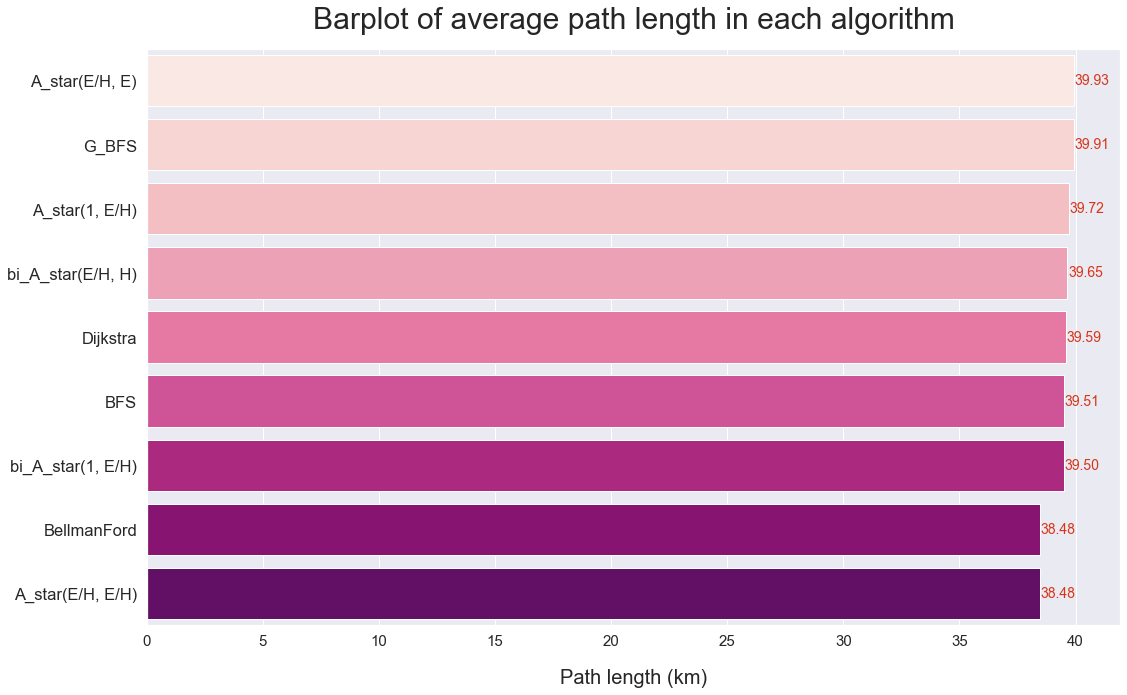

In [42]:
fig = plt.figure(figsize=(16, 10))
sns.set(font_scale=1.5)

Bell_columns = list(filter(lambda x: "BellmanFord" in x, pathLen.columns))

mean_data = (
    np.mean(
        pathLen[
            [
                "BFS",
                "Dijkstra(1)",
                "BellmanFord(Euclidean)",
                "G_BFS(Haversine)",
                "A_star(1, Euclidean)",
                "A_star(Euclidean, Euclidean)",
                "bi_A_star(1, Haversine)",
                "bi_A_star(Haversine, Euclidean)",
                "bi_A_star(Euclidean, Haversine)",
            ]
        ]
    )
    .to_frame()
    .T
)
mean_data.rename(
    columns={
        "Dijkstra(1)": "Dijkstra",
        "BellmanFord(Euclidean)": "BellmanFord",
        "G_BFS(Haversine)": "G_BFS",
        "A_star(1, Euclidean)": "A_star(1, E/H)",
        "A_star(Euclidean, Euclidean)": "A_star(E/H, E/H)",
        "bi_A_star(Haversine, Euclidean)": "A_star(E/H, E)",
        "bi_A_star(1, Haversine)": "bi_A_star(1, E/H)",
        "bi_A_star(Euclidean, Haversine)": "bi_A_star(E/H, H)",
    },
    inplace=True,
)

sorted_data = mean_data.sort_values(by=0, axis=1, ascending=False)
bar = sns.barplot(data=sorted_data, orient="h", palette="RdPu")

# 遍历每个条形
for p in bar.patches:
    # 获取条形的位置和高度
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2

    # 在适当的位置添加文本
    bar.text(
        x, y, "{:.2f}".format(p.get_width()), va="center", color="#d8351a", fontsize=14
    )

plt.title("Barplot of average path length in each algorithm", fontsize=30, pad=20)
plt.xticks(fontsize=15)
plt.xlabel("Path length (km)", fontsize=20, labelpad=20)
plt.tight_layout()
plt.show()

fig.savefig("present/pathLen2.svg")

# time

In [43]:
# real_time = pd.read_csv('data/real_time.csv')
# real_time = real_time.drop(['Unnamed: 0'], axis=1)
# num = (real_time == 0).sum(axis=0).to_frame()
# num.rename(columns={0:'Number of Time 0'}, inplace=True)
# num.to_csv("present/0.csv")
# plt.figure(figsize=(20,14))
# sns.set(font_scale = 1.4)
# sns.boxplot(data=np.log(real_time+0.5))

# plt.xticks(rotation = 90);

In [44]:
iterate_time = pd.read_csv('data/iterate_time.csv')
iterate_time = iterate_time.drop(['Unnamed: 0'], axis=1)
iterate_time

,BFS,Dijkstra(1),Dijkstra(Haversine),Dijkstra(Euclidean),BellmanFord(Euclidean),G_BFS(Euclidean),"A_star(1, Euclidean)","A_star(1, Haversine)","A_star(Euclidean, Euclidean)","A_star(Euclidean, Haversine)","A_star(Haversine, Euclidean)","A_star(Haversine, Haversine)","bi_A_star(1, Euclidean)","bi_A_star(1, Haversine)","bi_A_star(Euclidean, Euclidean)","bi_A_star(Euclidean, Haversine)","bi_A_star(Haversine, Euclidean)","bi_A_star(Haversine, Haversine)"
0,45,38,62,62,93330,19,38,38,19,19,19,19,13,13,12,12,12,12
1,124,132,127,127,93330,18,119,119,35,35,35,35,40,40,25,25,25,25
2,96,96,126,126,93330,11,96,96,21,21,21,21,15,15,16,16,16,16
3,260,260,301,301,93330,20,253,253,61,61,61,61,42,42,16,16,16,16
4,130,136,138,138,93330,10,116,116,10,10,10,10,29,29,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,213,217,256,256,93330,38,206,206,98,98,98,98,63,63,27,27,27,27
196,123,137,128,128,93330,19,121,121,38,38,38,38,28,28,16,16,16,16
197,300,299,311,311,93330,39,297,297,111,111,111,111,53,53,35,35,35,35
198,226,240,240,240,93330,25,226,226,52,52,52,52,23,23,15,15,15,15


In [45]:
# (iterate_time==0).sum()

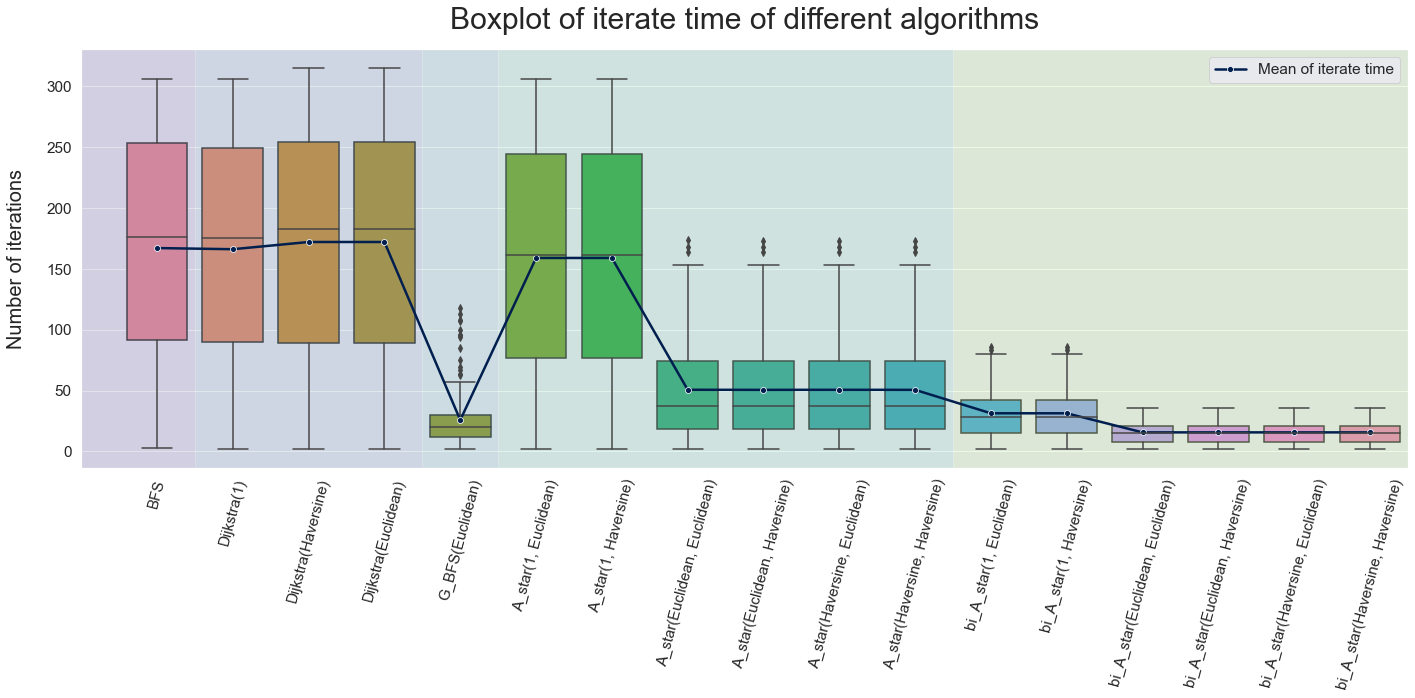

In [46]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.4)

colors = sns.color_palette("viridis", 5)
plt.axvspan(-1, 0.5, facecolor=colors[0], alpha=0.15)  # Specify the range of the first partition
plt.axvspan(0.5, 3.5, facecolor=colors[1], alpha=0.15)  # Specify the range of the second partition
plt.axvspan(3.5, 4.5, facecolor=colors[2], alpha=0.15)  # Specify the range of the second partition
plt.axvspan(4.5, 10.5, facecolor=colors[3], alpha=0.15)  # Specify the range of the first partition
plt.axvspan(10.5, 16.5, facecolor=colors[4], alpha=0.15)  # Specify the range of the second partition

sns.boxplot(data=iterate_time.drop(["BellmanFord(Euclidean)"], axis=1))
sns.lineplot(data=np.mean(iterate_time.drop("BellmanFord(Euclidean)", axis=1)),marker = "o",linewidth=2.5, color = '#001f4f',label = "Mean of iterate time")

plt.title("Boxplot of iterate time of different algorithms", fontsize=30, pad=20)
plt.ylabel("Number of iterations", fontsize=20, labelpad=20)
# plt.xticks([0,2,4.5,8.5,14.5],["BFS","Dijkstra","Greedy BFS","A_star","Bidirectional A_star"] ,fontsize=15);
plt.xticks(rotation = 75, fontsize = 15)
# plt.text(1,np.max(iterate_time['Dijkstra(1)'])+50,'(1)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')
# plt.text(2,np.max(iterate_time['Dijkstra(Haversine)'])+50,'(Haversine)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')
# plt.text(3,np.max(iterate_time['Dijkstra(Euclidean)'])+50,'(Euclidean)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')

# plt.text(4,np.max(iterate_time['G_BFS(Haversine)'])+50,'(Haversine)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')
# plt.text(5,np.max(iterate_time['G_BFS(Euclidean)'])+50,'(Euclidean)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')

# plt.text(6,np.max(iterate_time['A_star(1, Euclidean)'])+50,'(1, Euclidean)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')
# plt.text(7,np.max(iterate_time['A_star(1, Haversine)'])+50,'(1, Haversine)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')
# plt.text(8,np.max(iterate_time['A_star(Euclidean, Euclidean)'])+50,'(Euclidean, Euclidean)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')
# plt.text(9,np.max(iterate_time['A_star(Euclidean, Haversine)'])+50,'(Euclidean, Haversine)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')
# plt.text(10,np.max(iterate_time['A_star(Haversine, Euclidean)'])+50,'(Haversine, Euclidean)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')
# plt.text(11,np.max(iterate_time['A_star(Haversine, Haversine)'])+50,'(Haversine, Haversine)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')

# plt.text(12,np.min(iterate_time['A_star(1, Euclidean)'])-30,'(1, Euclidean)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')
# plt.text(13,np.min(iterate_time['A_star(1, Haversine)'])-30,'(1, Haversine)', ha='center', rotation = 90,va= 'bottom',fontsize=15,color='#d8351a')
# plt.text(14,np.min(iterate_time['A_star(Euclidean, Euclidean)'])-30,'(Euclidean, Euclidean)', ha='center', rotation = 90,va= 'bottom',fontsize=13,color='#d8351a')
# plt.text(15,np.min(iterate_time['A_star(Euclidean, Haversine)'])-30,'(Euclidean, Haversine)', ha='center', rotation = 90,va= 'bottom',fontsize=13,color='#d8351a')
# plt.text(16,np.min(iterate_time['A_star(Haversine, Euclidean)'])-30,'(Haversine, Euclidean)', ha='center', rotation = 90,va= 'bottom',fontsize=13,color='#d8351a')
# plt.text(17,np.min(iterate_time['A_star(Haversine, Haversine)'])-30,'(Haversine, Haversine)', ha='center', rotation = 90,va= 'bottom',fontsize=13,color='#d8351a')

plt.xlim(-1,16.5)
# 调整布局
plt.tight_layout()

plt.savefig("present/iterate_time1.svg")

In [47]:
# plt.figure(figsize=(20,10))
# sns.set(font_scale = 1.4)

# colors = sns.color_palette("viridis", 5)
# plt.axvspan(-1, 0.5, facecolor=colors[0], alpha=0.2)  # Specify the range of the first partition
# plt.axvspan(0.5, 3.5, facecolor=colors[1], alpha=0.2)  # Specify the range of the second partition
# plt.axvspan(3.5, 5.5, facecolor=colors[2], alpha=0.2)  # Specify the range of the second partition
# plt.axvspan(5.5, 11.5, facecolor=colors[3], alpha=0.2)  # Specify the range of the first partition
# # plt.axvspan(11.5, 17.5, facecolor=colors[4], alpha=0.15)  # Specify the range of the second partition

# # 找出列名中含有"bi_A_star"的列
# bi_A_star_columns = list(filter(lambda x: 'bi_A_star' in x, iterate_time.columns))
# Bell_columns = list(filter(lambda x: 'BellmanFord' in x, iterate_time.columns))

# sns.boxplot(data=iterate_time.drop([*Bell_columns,*bi_A_star_columns], axis=1))
# sns.lineplot(data=np.mean(iterate_time.drop([*Bell_columns,*bi_A_star_columns], axis=1)),marker = "o",linewidth=2.5, color = '#001f4f',label = "Mean of iterate time")

# plt.title("Boxplot of iterate time of different algorithms", fontsize=30, pad=20)
# plt.ylabel("Number of iterations", fontsize=20, labelpad=20)
# plt.xlim(-1,11.5)
# plt.xticks(rotation=70 ,fontsize=15);

# # 调整布局
# plt.tight_layout()

# plt.savefig("present/iterate_time2.svg")